# Human Development Index

In [1249]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
from urllib.request import urlopen
import pycountry
import seaborn as sns

In [1250]:
url = 'https://en.m.wikipedia.org/wiki/List_of_countries_by_Human_Development_Index'
html = urlopen(url) 
soup = BeautifulSoup(html, 'html.parser')

In [1251]:
tables = soup.find_all('body')

In [1252]:
# On site there are 2 tables with the class "wikitable"
# The following line will generate a list of HTML content for each table
tabl = soup.find_all("table", attrs={"class": "wikitable"})
print("Number of tables on site: ",len(tabl))

Number of tables on site:  2


In [1253]:
table1 = tabl[0]

body = table1.find_all("tr")
head = body[0]
body_rows = body[1:]

headings = []

for item in head.find_all("th"):
    item = (item.text).rstrip("\n")
    headings.append(item)
print(headings)

['Rank', 'Nation', 'HDI']


In [1254]:
#print(body_rows[0])
all_rows = [] # will be a list for list for all rows
for row_num in range(len(body_rows)): # A row at a time
    row = [] # this will old entries for one row
    for row_item in body_rows[row_num].find_all("td"): #loop through all row entries
        # row_item.text removes the tags from the entries
        # the following regex is to remove \xa0 and \n and comma from row_item.text
        # xa0 encodes the flag, \n is the newline and comma separates thousands in numbers
        aa = re.sub("(\xa0)|(\n)|,","",row_item.text)
        #append aa to row - note one row entry is being appended
        row.append(aa)
    # append one row to all_rows
    all_rows.append(row)

In [1255]:
count = 0
for i in all_rows:
    if len(i) >1:
        count+=1
print(count)

189


In [1256]:
country_data = []
for i in all_rows:
    if len(i) > 1:
        country_data.append(i)

In [1257]:
country_data[0:6]

[['1', '', '0.957', ' 0.20%'],
 ['2', ' (7)', '0.955', ' 0.65%'],
 ['2', '', '0.955', ' 0.16%'],
 ['4', ' (7)', '0.949', ' 0.54%'],
 ['4', ' (4)', '0.949', ' 0.62%'],
 ['6', ' (3)', '0.947', ' 0.24%']]

In [1258]:
df = pd.DataFrame(country_data)

In [1259]:
df.head()

,0,1,2,3
0,1,,0.957,0.20%
1,2,(7),0.955,0.65%
2,2,,0.955,0.16%
3,4,(7),0.949,0.54%
4,4,(4),0.949,0.62%


In [1260]:
project_href = [i['href'] for i in soup.find_all('a', href=True) if i['href'] != "#"]

nations = []
for i in project_href[85:276]:
    for j in i.split('/')[-1:]:
        nations.append(j)
print(nations)

['#cite_note-2020_components-2', '#cite_note-2020_trends-18', 'Norway', 'Republic_of_Ireland', 'Switzerland', 'Hong_Kong', 'Iceland', 'Germany', 'Sweden', 'Australia', 'Netherlands', 'Denmark', 'Finland', 'Singapore', 'United_Kingdom', 'Belgium', 'New_Zealand', 'Canada', 'United_States', 'Austria', 'Israel', 'Japan', 'Liechtenstein', 'Slovenia', 'Luxembourg', 'South_Korea', 'Spain', 'France', 'Czech_Republic', 'Malta', 'Estonia', 'Italy', 'United_Arab_Emirates', 'Greece', 'Cyprus', 'Lithuania', 'Poland', 'Andorra', 'Latvia', 'Portugal', 'Slovakia', 'Hungary', 'Saudi_Arabia', 'Bahrain', 'Chile', 'Croatia', 'Qatar', 'Argentina', 'Brunei', 'Montenegro', 'Romania', 'Palau', 'Kazakhstan', 'Russia', 'Belarus', 'Turkey', 'Uruguay', 'Bulgaria', 'Panama', 'The_Bahamas', 'Barbados', 'Oman', 'Georgia_(country)', 'Costa_Rica', 'Malaysia', 'Kuwait', 'Serbia', 'Mauritius', 'Seychelles', 'Trinidad_and_Tobago', 'Albania', 'Cuba', 'Iran', 'Sri_Lanka', 'Bosnia_and_Herzegovina', 'Grenada', 'Mexico', 'Sai

In [1261]:
stp = [i for i,j in enumerate(nations) if j == "S%C3%A3o_Tom%C3%A9_and_Pr%C3%ADncipe"]

In [1262]:
stp

[138]

In [1263]:
def text_cleaner(x):
    n = []
    for i in x:
        if '#' in i:
            pass
        else:
            n.append(i.replace('_', ' '))
    return n

In [1264]:
nation = text_cleaner(nations)

In [1265]:
#verify all data from column nation had been collected
len(nation)

187

In [1266]:
country = pd.DataFrame(nation)

In [1267]:
data_frame = pd.merge(country,df,left_index = True, right_index = True)

In [1268]:
country.rename(columns = {0:"Country"})

,Country
0,Norway
1,Republic of Ireland
2,Switzerland
3,Hong Kong
4,Iceland
...,...
182,Sierra Leone
183,Mali
184,Burundi
185,South Sudan


In [1269]:
data_frame.head(3)

,0_x,0_y,1,2,3
0,Norway,1,,0.957,0.20%
1,Republic of Ireland,2,(7),0.955,0.65%
2,Switzerland,2,,0.955,0.16%


In [1270]:
del data_frame['0_y']

In [1271]:
#data_frame.columns = ['Country', 'HDI Change (5 yrs)', 'HDI (2020 Report)', 'Avg. annual growth (%)']

In [1272]:
data_frame.isnull().sum()

0_x    0
1      0
2      0
3      0
dtype: int64

In [1273]:
data_frame.columns

Index(['0_x', 1, 2, 3], dtype='object')

In [1274]:
data_frame.rename(columns = {'0_x':'Country', 1: 'HDI Change (5 yrs)', 2:'HDI (2020 Report)', 3:'Avg. Annual Growth'},inplace = True)

In [1275]:
data_frame.head()

,Country,HDI Change (5 yrs),HDI (2020 Report),Avg. Annual Growth
0,Norway,,0.957,0.20%
1,Republic of Ireland,(7),0.955,0.65%
2,Switzerland,,0.955,0.16%
3,Hong Kong,(7),0.949,0.54%
4,Iceland,(4),0.949,0.62%


In [1276]:
data_frame['Country'][134] = "Sao Tome and Principe"

In [1277]:
data_frame['Country'][134]

'Sao Tome and Principe'

In [1278]:
countries_negative_hdi_growth = ['Lebanon', 'Jordan', 'Libya', 'Venezuela', 'East Timor', 'Syria', 'Yemen']

In [1279]:
data_frame.head()

,Country,HDI Change (5 yrs),HDI (2020 Report),Avg. Annual Growth
0,Norway,,0.957,0.20%
1,Republic of Ireland,(7),0.955,0.65%
2,Switzerland,,0.955,0.16%
3,Hong Kong,(7),0.949,0.54%
4,Iceland,(4),0.949,0.62%


In [1280]:
data_frame.isnull().sum()

Country               0
HDI Change (5 yrs)    0
HDI (2020 Report)     0
Avg. Annual Growth    0
dtype: int64

In [1281]:
data_frame.dtypes

Country               object
HDI Change (5 yrs)    object
HDI (2020 Report)     object
Avg. Annual Growth    object
dtype: object

In [1282]:
data_frame.columns

Index(['Country', 'HDI Change (5 yrs)', 'HDI (2020 Report)',
       'Avg. Annual Growth'],
      dtype='object')

In [1283]:
data_frame['Avg. Annual Growth'] = data_frame['Avg. Annual Growth'].apply(lambda x: x[:-1])

In [1284]:
n = []
for i in data_frame['Avg. Annual Growth']:
    if i == 'NA[a':
        n.append(0)
    else:
        n.append(i)
#print(pd.Series(n))

In [1285]:
data_frame['Avg. Annual Growth'] = n

In [1286]:
data_frame['Avg. Annual Growth'] = data_frame['Avg. Annual Growth'].str.strip().astype(float)

In [1287]:
data_frame["HDI Change (5 yrs)"] = data_frame["HDI Change (5 yrs)"].apply(lambda x: x[2] if len(x) > 0 else x)

In [1288]:
data_frame['HDI (2020 Report)'] = data_frame['HDI (2020 Report)'].astype(float)

In [1289]:
data_frame['HDI (2020 Report)'] = data_frame['HDI (2020 Report)'] * 100

In [1290]:
data_frame.dtypes

Country                object
HDI Change (5 yrs)     object
HDI (2020 Report)     float64
Avg. Annual Growth    float64
dtype: object

In [1291]:
data_frame.head()

,Country,HDI Change (5 yrs),HDI (2020 Report),Avg. Annual Growth
0,Norway,,95.7,0.20
1,Republic of Ireland,7,95.5,0.65
2,Switzerland,,95.5,0.16
3,Hong Kong,7,94.9,0.54
4,Iceland,4,94.9,0.62


In [1292]:
#def annual_growth(x,y):
x = []
neg_growth_countries = ['Lebanon', 'Jordan', 'Libya', 'Venezuela', 'East Timor', 'Syria', 'Yemen']
for i in range(len(data_frame['Avg. Annual Growth'])):
    if data_frame.iloc[i,0] in neg_growth_countries:
        x.append(-1 * data_frame.iloc[i,3])
    else:
        x.append(data_frame.iloc[i,3])        

In [1293]:
data_frame['Avg. Annual Growth'] = x

In [1294]:
data_frame.columns

Index(['Country', 'HDI Change (5 yrs)', 'HDI (2020 Report)',
       'Avg. Annual Growth'],
      dtype='object')

In [1295]:
data_frame

,Country,HDI Change (5 yrs),HDI (2020 Report),Avg. Annual Growth
0,Norway,,95.7,0.20
1,Republic of Ireland,7,95.5,0.65
2,Switzerland,,95.5,0.16
3,Hong Kong,7,94.9,0.54
4,Iceland,4,94.9,0.62
...,...,...,...,...
182,Sierra Leone,2,45.2,1.40
183,Mali,,43.4,0.69
184,Burundi,5,43.3,0.58
185,South Sudan,3,43.3,0.61


In [1296]:
#Need GeoSchemes, scrape this
url_ungs = "https://en.wikipedia.org/wiki/List_of_countries_by_United_Nations_geoscheme"
html1 = urlopen(url_ungs) 
soup1 = BeautifulSoup(html1, 'html.parser')

In [1297]:
geoschemes = soup1.find_all('body')

In [1298]:
tables1 = soup1.find_all("table", attrs={"class": "wikitable"})
print("Number of tables on site: ",len(tabl))

Number of tables on site:  2


In [1299]:
table_ungs = tables1[0]

body = table_ungs.find_all("tr")
head = body[0]
body_rows = body[1:]

headings = []

for item in head.find_all("th"):
    item = (item.text).rstrip("\n")
    headings.append(item)
print(headings)

['Country or Area', 'Sub-Subregion', 'Subregion', 'Region', 'UNSD M49 Codes']


In [1300]:
all_rows = [] # will be a list for list for all rows
for row_num in range(len(body_rows)): # A row at a time
    row = [] # this will old entries for one row
    for row_item in body_rows[row_num].find_all("td"): #loop through all row entries
        # row_item.text removes the tags from the entries
        # the following regex is to remove \xa0 and \n and comma from row_item.text
        # xa0 encodes the flag, \n is the newline and comma separates thousands in numbers
        aa = re.sub("(\xa0)|(\n)|,","",row_item.text)
        #append aa to row - note one row entry is being appended
        row.append(aa)
    # append one row to all_rows
    all_rows.append(row)

In [1301]:
type(all_rows)

list

In [1302]:
df1 = pd.DataFrame(all_rows)

In [1303]:
df1

,0,1,2,3,4
0,Algeria,,Northern Africa,Africa,012 < 015 < 002 < 001
1,Egypt,,Northern Africa,Africa,818 < 015 < 002 < 001
2,Libya,,Northern Africa,Africa,434 < 015 < 002 < 001
3,Morocco,,Northern Africa,Africa,504 < 015 < 002 < 001
4,Sudan,,Northern Africa,Africa,729 < 015 < 002 < 001
...,...,...,...,...,...
244,Samoa,,Polynesia,Oceania,882 < 061 < 009 < 001
245,Tokelau,,Polynesia,Oceania,772 < 061 < 009 < 001
246,Tonga,,Polynesia,Oceania,776 < 061 < 009 < 001
247,Tuvalu,,Polynesia,Oceania,798 < 061 < 009 < 001


In [1304]:
headings

['Country or Area', 'Sub-Subregion', 'Subregion', 'Region', 'UNSD M49 Codes']

In [1305]:
df1.rename(columns = {0:'Country',1:'Sub-Subregion',2:'Subregion',3:'Region',4:'UNSD M49 Codes'}, inplace = True)

In [1306]:
data_frame.columns

Index(['Country', 'HDI Change (5 yrs)', 'HDI (2020 Report)',
       'Avg. Annual Growth'],
      dtype='object')

In [1307]:
df1['Country'] = df1['Country'].apply(lambda x: x.strip())

In [1308]:
df = pd.merge(data_frame,df1, on = 'Country', how = 'left')

In [1309]:
df.fillna('', inplace=True)

In [1310]:
df.replace('', np.nan, inplace = True)

In [1311]:
df.drop(columns = {"UNSD M49 Codes"}, inplace = True)

In [1314]:
missing_regions = {"Republic of Ireland": "Northern Europe",
                  "Hong Kong": "Eastern Asia",
                  "South Korea": "Eastern Asia",
                  "France": "Western Europe",
                  "Czech Republic": "Eastern Europe",
                  "The Bahamas": "Latin America and the Caribbean / North America",
                  "Georgia (country)": "Western Asia",
                  "State of Palestine": "Western Asia",
                  "Cape Verde": "Western Africa",
                  "Sao Tome and Principe":"Sub-Saharan Africa",
                  "Federated States of Micronesia":"Micronesia",
                  "Eswatini":"Sub-Saharan Africa",
                  "East Timor":"South-eastern Asia",
                  "Myanmar":"South-eastern Asia",
                  "Republic of the Congo":"Sub-Saharan Africa",
                  "Ivory Coast": "Sub-Saharan Africa",
                  "The Gambia": "Sub-Saharan Africa",
                  "Democratic Republic of the Congo": "Sub-Saharan Africa"
                  }

In [1315]:
df['Subregion'] = df['Subregion'].fillna(df.Country.map(missing_regions))

In [1317]:
df['Sub-Subregion'] = df['Subregion'].where(df['Sub-Subregion'].isna(),df['Sub-Subregion'])

In [1343]:
regions = {"Republic of Ireland": "Europe",
                  "Hong Kong": "Asia",
                  "South Korea": "Asia",
                  "France": "Europe",
                  "Czech Republic": "Europe",
                  "The Bahamas": "Americas",
                  "Georgia (country)": "Asia",
                  "State of Palestine": "Asia",
                  "Cape Verde": "Africa",
                  "Sao Tome and Principe":"Africa",
                  "Federated States of Micronesia":"Oceania",
                  "Eswatini":"Africa",
                  "East Timor":"Asia",
                  "Myanmar":"Asia",
                  "Republic of the Congo":"Africa",
                  "Ivory Coast": "Africa",
                  "The Gambia": "Africa",
                  "Democratic Republic of the Congo": "Africa"
                  }

In [1344]:
df['Region'] = df['Region'].fillna(df.Country.map(regions))

In [1381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 186
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             187 non-null    object 
 1   HDI Change (5 yrs)  162 non-null    object 
 2   HDI (2020 Report)   187 non-null    float64
 3   Avg. Annual Growth  186 non-null    float64
 4   Sub-Subregion       187 non-null    object 
 5   Subregion           187 non-null    object 
 6   Region              187 non-null    object 
dtypes: float64(2), object(5)
memory usage: 16.7+ KB


In [1382]:
df.describe()

,HDI (2020 Report),Avg. Annual Growth
count,187.000000,186.000000
mean,72.591979,0.608172
std,14.668666,0.489922
min,39.800000,-1.870000
25%,60.750000,0.350000
50%,74.200000,0.565000
75%,83.350000,0.870000
max,95.700000,2.030000


In [1378]:
df[df['Avg. Annual Growth'] < 0]

,Country,HDI Change (5 yrs),HDI (2020 Report),Avg. Annual Growth,Sub-Subregion,Subregion,Region
91,Lebanon,6,74.4,-0.32,Western Asia,Western Asia,Asia
101,Jordan,3,72.9,-0.12,Western Asia,Western Asia,Asia
104,Libya,4,72.4,-1.08,Northern Africa,Northern Africa,Africa
112,Venezuela,4,71.1,-0.69,South America,Latin America and the Caribbean,Americas
140,East Timor,1,60.6,-0.40,South-eastern Asia,South-eastern Asia,Asia
151,Syria,2,56.7,-1.87,Western Asia,Western Asia,Asia
178,Yemen,1,47.0,-0.82,Western Asia,Western Asia,Asia


In [1391]:
df.sort_values('Avg. Annual Growth', ascending = False).head(10)

,Country,HDI Change (5 yrs),HDI (2020 Report),Avg. Annual Growth,Sub-Subregion,Subregion,Region
137,Eswatini,5,61.1,2.03,Sub-Saharan Africa,Sub-Saharan Africa,Africa
149,Zimbabwe,1,57.1,1.90,Eastern Africa,Sub-Saharan Africa,Africa
181,Burkina Faso,3,45.2,1.83,Western Africa,Sub-Saharan Africa,Africa
165,Djibouti,3,52.4,1.61,Eastern Africa,Sub-Saharan Africa,Africa
172,Ethiopia,5,48.5,1.58,Eastern Africa,Sub-Saharan Africa,Africa
161,Ivory Coast,7,53.8,1.56,Sub-Saharan Africa,Sub-Saharan Africa,Africa
177,Guinea,1,47.7,1.53,Western Africa,Sub-Saharan Africa,Africa
164,Lesotho,2,52.7,1.52,Southern Africa,Sub-Saharan Africa,Africa
128,Bhutan,1,65.4,1.46,Southern Asia,Southern Asia,Asia
180,Mozambique,2,45.6,1.44,Eastern Africa,Sub-Saharan Africa,Africa


In [1389]:
df.sort_values('Avg. Annual Growth', ascending = False).head(50).value_counts('Subregion',normalize = True)

Subregion
Sub-Saharan Africa                                 0.62
Southern Asia                                      0.12
South-eastern Asia                                 0.08
Western Asia                                       0.06
Northern Africa                                    0.04
Latin America and the Caribbean / North America    0.04
Southern Europe                                    0.02
Eastern Asia                                       0.02
dtype: float64

In [1380]:
#Countries with a negative HDI growth rate
df[df['Avg. Annual Growth'] < 0].value_counts("Sub-Subregion")

Sub-Subregion
Western Asia          4
South-eastern Asia    1
South America         1
Northern Africa       1
dtype: int64

''

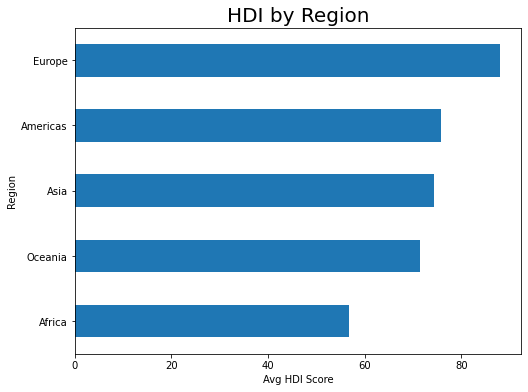

In [1355]:
plt.figure(figsize = (8,6))
plt.title('HDI by Region', size = 20)
plt.xlabel("Avg HDI Score")
df["HDI (2020 Report)"].groupby(df['Region']).mean().sort_values(ascending = True).plot(kind = 'barh')
;

In [1356]:
df['HDI (2020 Report)'].groupby(df["Sub-Subregion"]).mean().sort_values(ascending = False)

Sub-Subregion
Australia and New Zealand                          93.750000
Western Europe                                     92.937500
Northern America                                   92.750000
Northern Europe                                    92.560000
Eastern Asia                                       85.640000
Southern Europe                                    85.100000
Eastern Europe                                     83.140000
Latin America and the Caribbean / North America    81.400000
Western Asia                                       77.361111
South America                                      76.316667
Caribbean                                          74.733333
Central Asia                                       72.500000
Polynesia                                          72.000000
Central America                                    71.875000
South-eastern Asia                                 71.809091
Micronesia                                         69.500000
Northern A

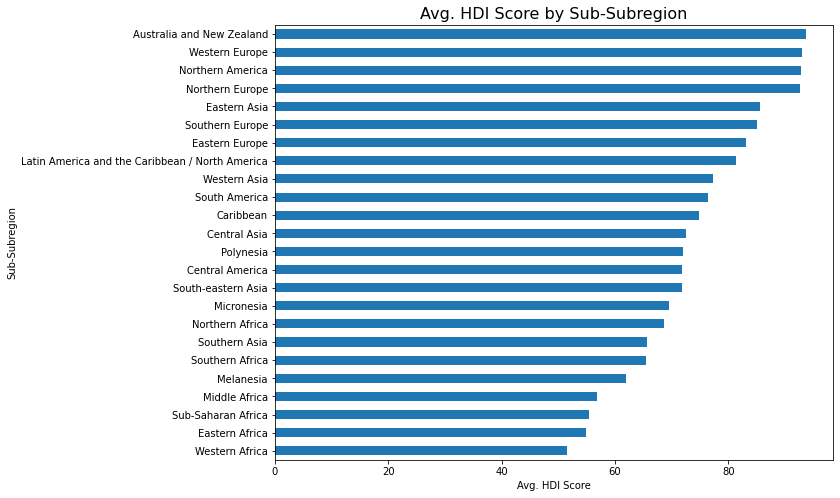

In [1360]:
plt.figure(figsize = (10,8))
plt.title('Avg. HDI Score by Sub-Subregion', size = 16)
df['HDI (2020 Report)'].groupby(df['Sub-Subregion']).mean().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel('Avg. HDI Score');

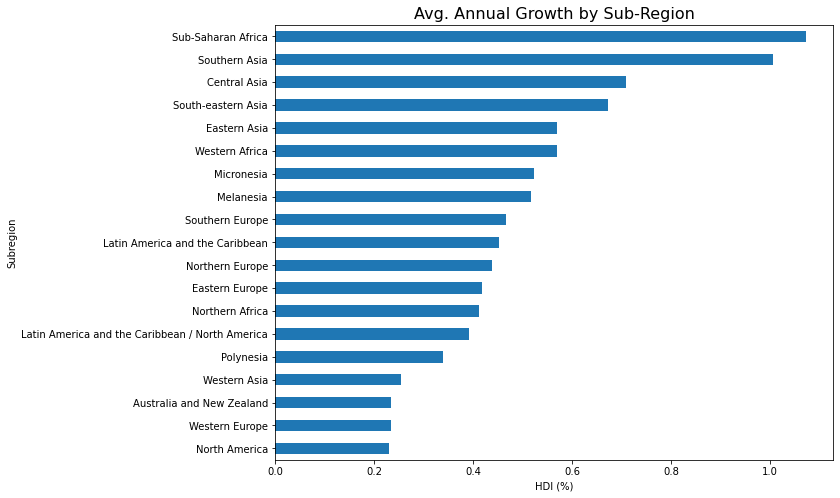

In [1362]:
plt.figure(figsize = (10,8))
plt.title('Avg. Annual Growth by Sub-Region', size = 16)
df['Avg. Annual Growth'].groupby(df.Subregion).mean().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel('HDI (%)');

In [1383]:
df[df['Region'] == 'Oceania'].sort_values('HDI (2020 Report)', ascending = False)

,Country,HDI Change (5 yrs),HDI (2020 Report),Avg. Annual Growth,Sub-Subregion,Subregion,Region
7,Australia,2,94.4,0.17,Australia and New Zealand,Australia and New Zealand,Oceania
14,New Zealand,3,93.1,0.30,Australia and New Zealand,Australia and New Zealand,Oceania
49,Palau,3,82.6,0.55,Micronesia,Micronesia,Oceania
92,Fiji,1,74.3,0.43,Melanesia,Melanesia,Oceania
103,Tonga,2,72.5,0.41,Polynesia,Polynesia,Oceania
110,Samoa,3,71.5,0.27,Polynesia,Polynesia,Oceania
116,Marshall Islands,[,70.4,NaN,Micronesia,Micronesia,Oceania
133,Kiribati,3,63.0,0.67,Micronesia,Micronesia,Oceania
135,Federated States of Micronesia,2,62.0,0.35,Micronesia,Micronesia,Oceania
139,Vanuatu,5,60.9,0.35,Melanesia,Melanesia,Oceania


## United Nations geoscheme

Statistical regions as defined by the UNSD. Antarctica is not shown.
The United Nations geoscheme is a system which divides the 249 countries and territories of the world into 6 regional and 22 subregional groups. It was devised by the United Nations Statistics Division (UNSD) based on the M49 coding classification.

In [ ]:
results_list = []

# Get all the <td class="title"... elements
all_td = soup.find_all('td', {'class':'title'})
for element in all_td:
    # start a dictionary to store this item's data
    result = {}
    
    # get the title and full link/url
    a_href = element.find('a')
    if a_href:
        result['title'] = a_href.text   # element text
        result['link'] = a_href['href'] # href link
        
    # get the url domain
    span = element.find('span', {'class':'comhead'})
    if span:
        result['url'] = span.text.strip()[1:-1]
        
    # only store "full" rows of data
    if len(result) == 3:
        results_list.append(result)
if len(results_list) > 1:        
    print(results_list[0])

In [ ]:
array = [5,6,2,3,8] 
x = 12

In [ ]:
import itertools
def subarray_sums(x,y):
    n = []
    for i in range(len(x)+1):
        for sub in itertools.combinations(x,i):
            if sum(sub) > y:
                n.append(sub)
    return  sorted(n)[-1], sum(sorted(n)[-1])
        

In [ ]:
subarray_sums(array,x)